In [8]:
# --- Step 1: Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from google.colab import files

# --- Step 2: Upload dataset & model files ---
print("📂 Please upload your dataset (.csv or .zip) and model (.pkl) files:")
uploaded = files.upload()


📂 Please upload your dataset (.csv or .zip) and model (.pkl) files:


KeyboardInterrupt: 

In [9]:
import os
import zipfile

# If zip uploaded → extract it
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall()
        print("✅ Extracted zip file.")
    elif filename.endswith('.csv'):
        print("✅ CSV file detected.")

# Load dataset (replace with correct filename if different)
if os.path.exists('data.csv'):
    df = pd.read_csv('data.csv')
elif os.path.exists('electricity_theft_data.csv'):
    df = pd.read_csv('electricity_theft_data.csv')
else:
    raise FileNotFoundError("❌ Could not find dataset. Please check the uploaded file name.")

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (42372, 1036)


,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


In [10]:
# Load the model
model = joblib.load('electricity_theft_model_v2.pkl')
print("✅ Model loaded successfully!")

# Prepare dataset
X = df.drop(['CONS_NO', 'FLAG'], axis=1)
y = df['FLAG']

# Handle missing values
X.fillna(0, inplace=True)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data prepared and split successfully!")


✅ Model loaded successfully!
✅ Data prepared and split successfully!


In [12]:
y_pred = model.predict(X_test)

print("📊 Model Evaluation Metrics:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


📊 Model Evaluation Metrics:

Accuracy: 0.933
Precision: 0.58
Recall: 0.912
F1 Score: 0.709

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7717
           1       0.58      0.91      0.71       758

    accuracy                           0.93      8475
   macro avg       0.79      0.92      0.84      8475
weighted avg       0.95      0.93      0.94      8475



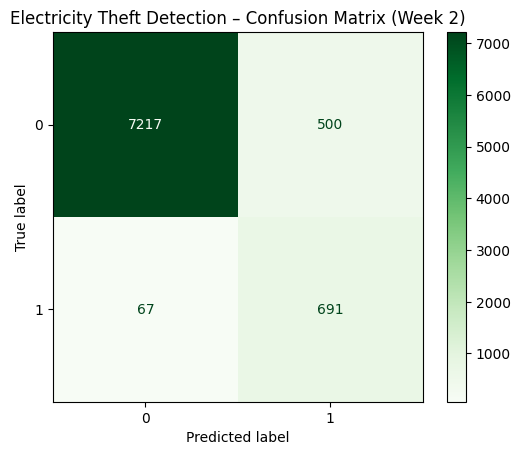

✅ Confusion matrix saved as 'confusion_matrix_week2.png'


<Figure size 640x480 with 0 Axes>

In [14]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens')
plt.title("Electricity Theft Detection – Confusion Matrix (Week 2)")
plt.show()

plt.savefig("confusion_matrix_week2.png")
print("✅ Confusion matrix saved as 'confusion_matrix_week2.png'")



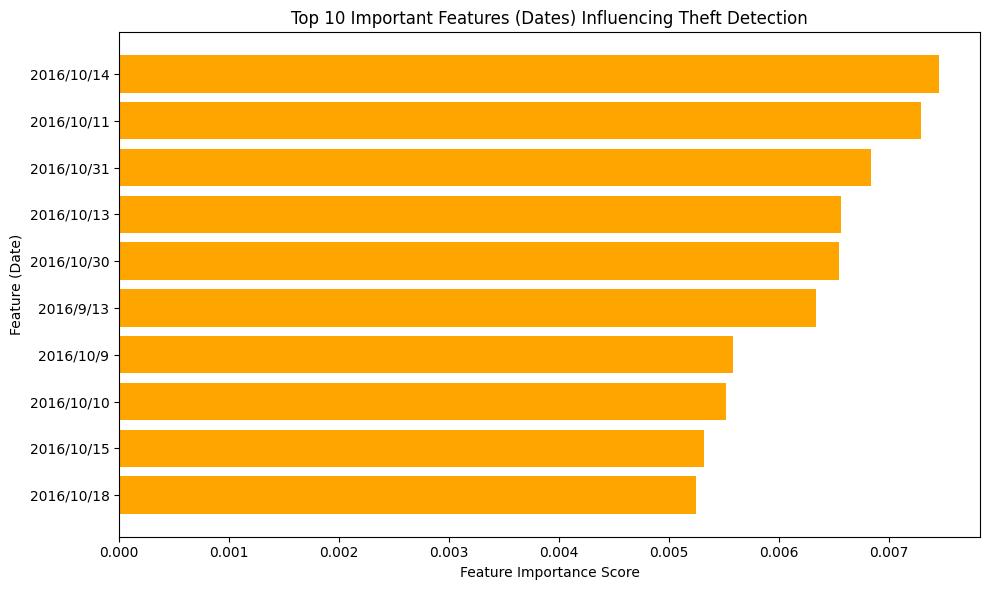

✅ Feature importance plot saved as 'feature_importance_week2.png'


<Figure size 640x480 with 0 Axes>

In [18]:
# Check if feature importance attribute exists
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:10]
    top_features = X.columns[indices]
    top_importances = importances[indices]

    plt.figure(figsize=(10,6))
    plt.barh(top_features[::-1], top_importances[::-1], color='orange')
    plt.title("Top 10 Important Features (Dates) Influencing Theft Detection")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Feature (Date)")
    plt.tight_layout()
    plt.show()

    plt.savefig("feature_importance_week2.png")
    print("✅ Feature importance plot saved as 'feature_importance_week2.png'")
else:
    print("⚠️ The current model does not support feature_importances_. Try RandomForest for this visualization.")


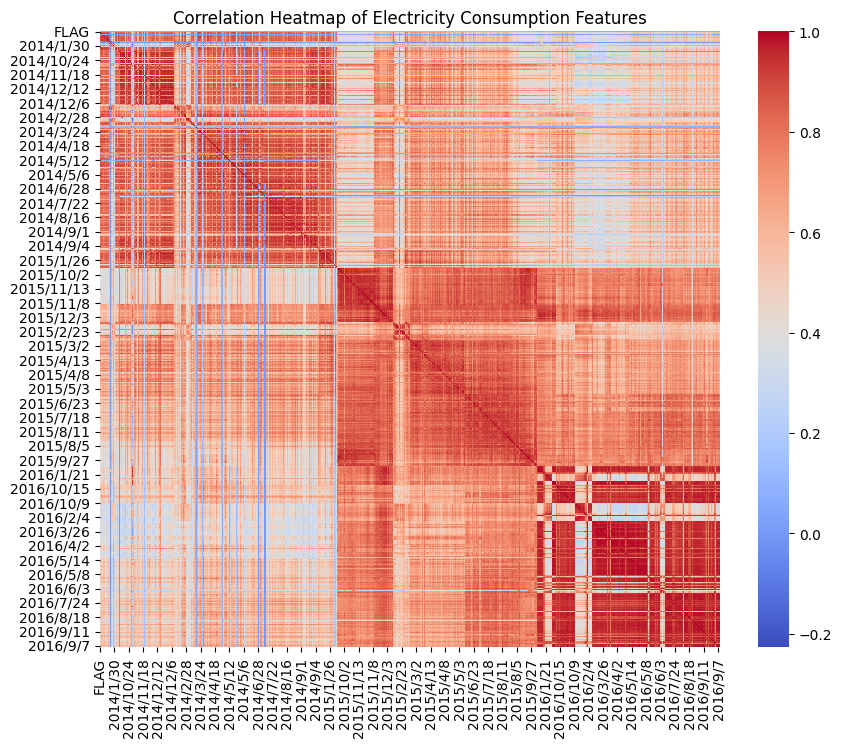

✅ Correlation heatmap saved as 'correlation_heatmap_week2.png'


<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(10,8))

# Only include numeric columns
numeric_df = df.drop(columns=['CONS_NO'])  # remove string column
corr = numeric_df.corr()

sns.heatmap(corr, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Electricity Consumption Features")
plt.show()

plt.savefig("correlation_heatmap_week2.png")
print("✅ Correlation heatmap saved as 'correlation_heatmap_week2.png'")
